# Business Understanding

## Wie (de opdrachtgever)? 

Appbakkers (Corné & Guido) is een bedrijf die (mobiele) applicaties ontwikkeld.  

## Wat (de opdracht)? 

Bij opname van een patiënt wordt er een elektrocardiogram (ECG) gemaakt. Hierbij worden alle elektrische impulsen in het hart geregistreerd, waardoor kan worden afgeleid welke gebieden van het hart naar behoren functioneren.  

Arts-onderzoekers vragen zich af of het aantal hartslagen per minuut een goede voorspeller kan zijn van de calciumscore. Gebruik de ECG-datasets om per dataset het gemiddelde aantal hartslagen per minuut te bepalen (bedenk goed welke onderdelen van de ECGs je hiervoor allemaal gaat gebruiken): indien deze boven de 100 slagen per minuut is heet dit tachycardie, indien deze onder de 60 slagen per minuut is heet dit bradycardie.  

Onderzoek daarna met deze resultaten en de calciumscore uitkomsten of de aanwezigheid van bradycardie/tachycardie/normale hartslag (en meer specifiek het aantal hartslagen per minuut) de calciumscore kan voorspellen. Bepaal hierna of de datasets een regelmatig of onregelmatig hartritme vertonen en probeer je model hiermee te verbeteren. Kan je model nu accuraat de calciumscore voorspellen? Zijn er risico’s bij het gebruik van je model in de praktijk? Als je nog tijd over hebt, is het interessant om je gegevens te combineren met die van opdracht 1. Kan je elkaars modellen verder verbeteren?

## Wanneer (tijdsframe)? 

Deze opdracht voeren we uit vanaf 13 april ’22. Op deze dag hebben we de kennismaking gehad met onze opdrachtgever. Hierin hebben we de opdracht besproken en een aantal afspraken gemaakt. De einddatum van de opdracht zal zijn op 3 juni ’22. 

## Waarom (doel)? 

Het doel is om te achterhalen of hartslag een goede voorspeller kan zijn van de calciumscore. 

Als het model gemaakt is om dit te voorspellen kan deze verbeterd/uitgebreid worden met de resultaten en de calciumscore uitkomsten of de aanwezigheid van bradycardie/tachycardie/normale hartslag (en meer specifiek het aantal hartslagen per minuut) de calciumscore kan voorspellen.  

## Wat (wat gaan we gebruiken)? 

Door middel van Jupyter notebooks gaan wij het model ontwikkelen.  
ECG viewer om ECG´s bestanden door te lezen. 

# Data Understanding

Wij hebben 2 publieke datasets gekregen om mee bezig te gaan. Deze zijn "cardio_train.csv" en "riskchartsampledata.xlsx". Hieronder is te lezen wat de kolommen in deze datasets betekenen.

### "cardio_train.csv"

* id          
    De id van de rij, **integer** <br/>
* age         
    De leeftijd van de patient in dagen, **integer** <br/>
* gender      
    Het geslacht van de patient, waarbij 1 een man is en 2 een vrouw, **category** <br/>
* height      
    De lengte van de patient, gegeven in centimeters, **integer** <br/>
* weight      
    Het gewicht van de patient, gegeven in kilogram, **float** <br/>
* ap_hi       
    De bovendruk van de patient, **integer**  <br/>
* ap_lo       
    De onderdruk van de patient, **integer**  <br/>
* cholesterol <br/>
    Hoe veel cholesterol de patient heeft, **category**  <br/>
* gluc        
    Hoe veel glucoses de patient heeft, **category**  <br/>
* smoke       
    Of de patient rookt, **boolean** <br/>
* alco        
    Of de patient alcohol drinkt, **boolean** <br/>
* active      
    Of de patient actief is in het dagelijks leven, **boolean** <br/>
* cardio      
    Of de patient een cardiovasculaire ziekte heeft, **boolean** <br/>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import pandas_profiling as pp
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [2]:
cardio_train = pd.read_csv("Data/cardio_train.csv", delimiter=';')

In [3]:
report1 = pp.ProfileReport(cardio_train, progress_bar=False)
report1.to_file('report1.html')

[Report van cardio_train](report1.html)

In [4]:
#sns.pairplot(cardio_train)

## Gender in cardio_train

In [5]:
cardio_train[['gender','height']].groupby('gender').agg(np.mean)

,height
gender,
1,161.355612
2,169.947895


De personen met 2 als gender zijn gemiddeld langer, dus is de 2 een man en 1 een vrouw.

# Data Preparation

## Aanpassen van data

In [6]:
#if (1 in cardio_train['gender'].unique()):
#    cardio_train['gender'] = ['male' if x is 2 else 'female' for x in cardio_train['gender']]
#cardio_train.astype('category',copy=False)


#cardio_train['age_category'] = pd.cut(cardio_train['age_in_years'], range(5,105,10))
#age_cat = [str(x.left) + '-' + str(x.right-1) for x in cardio_train['age_category']]
#cardio_train['age_category'] = age_cat
#cardio_train['age_category'].astype('category',copy=False)

In [7]:
cardio_train['age'] = (cardio_train['age']/365).apply(lambda x: int(x))


cardio_train['bmi'] = cardio_train['weight'] / (cardio_train['height']/100)**2 

cardio_train['ap_difference'] = cardio_train['ap_hi'] - cardio_train['ap_lo']

In [8]:
# ap_hi kan niet lager zijn dan ap_lo
cardio_train = cardio_train[:][cardio_train['ap_hi'] > cardio_train['ap_lo']]
cardio_train.shape

(68764, 15)

In [9]:
cardio_train.isnull()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,ap_difference
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
69996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
69997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
69998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
cardio_train.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,ap_difference
count,68764.000000,68764.000000,68764.000000,68764.000000,68764.000000,68764.000000,68764.000000,68764.000000,68764.000000,68764.000000,68764.000000,68764.000000,68764.000000,68764.000000,68764.000000
mean,49977.479641,52.827628,1.348613,164.359752,74.113846,128.840440,81.245230,1.364668,1.225583,0.087880,0.053342,0.803458,0.494765,27.521579,47.595210
std,28842.799204,6.769515,0.476535,8.190652,14.330819,155.203641,9.693745,0.678883,0.571448,0.283123,0.224716,0.397386,0.499976,6.067645,154.768117
min,0.000000,29.000000,1.000000,55.000000,11.000000,12.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.471784,4.000000
25%,25008.750000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115,40.000000
50%,50021.500000,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.346494,40.000000
75%,74867.250000,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.119376,50.000000
max,99999.000000,64.000000,2.000000,250.000000,200.000000,16020.000000,182.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,298.666667,15940.000000


# Modeling

<AxesSubplot:>

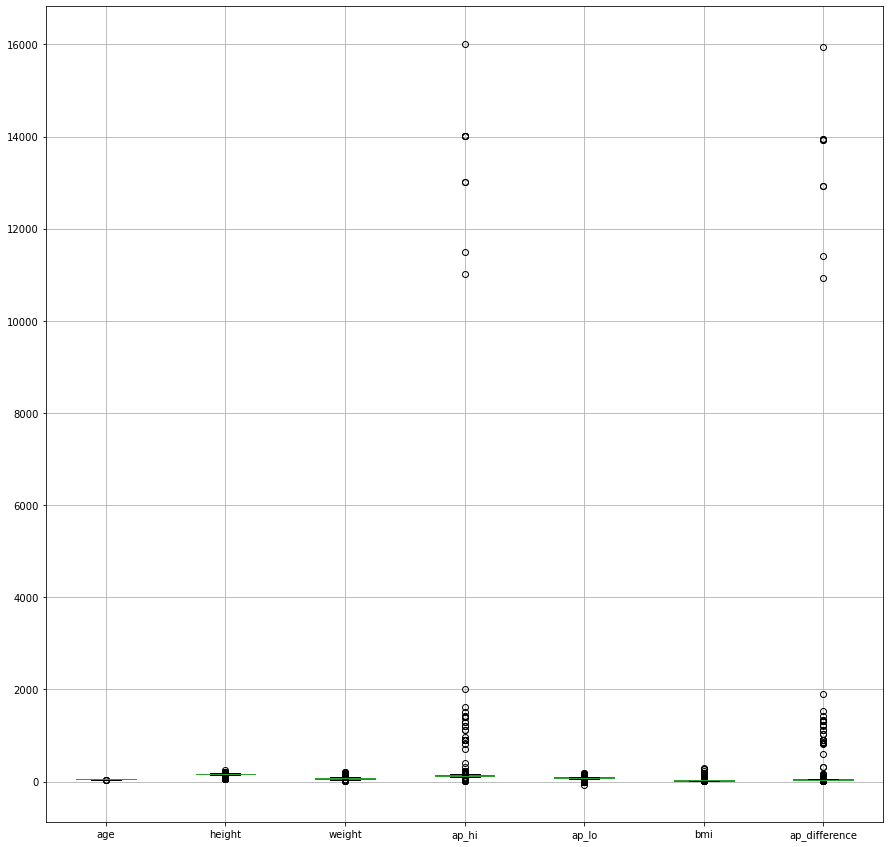

In [11]:
%config IPCompleter.greedy = True
%matplotlib inline
cardio_train[["age", "height", "weight", "ap_hi", "ap_lo", "bmi", "ap_difference"]].boxplot(figsize = (15,15))

In [12]:
cardio_train_norm = (cardio_train - cardio_train.min()) / (cardio_train.max() - cardio_train.min()) 

<AxesSubplot:>

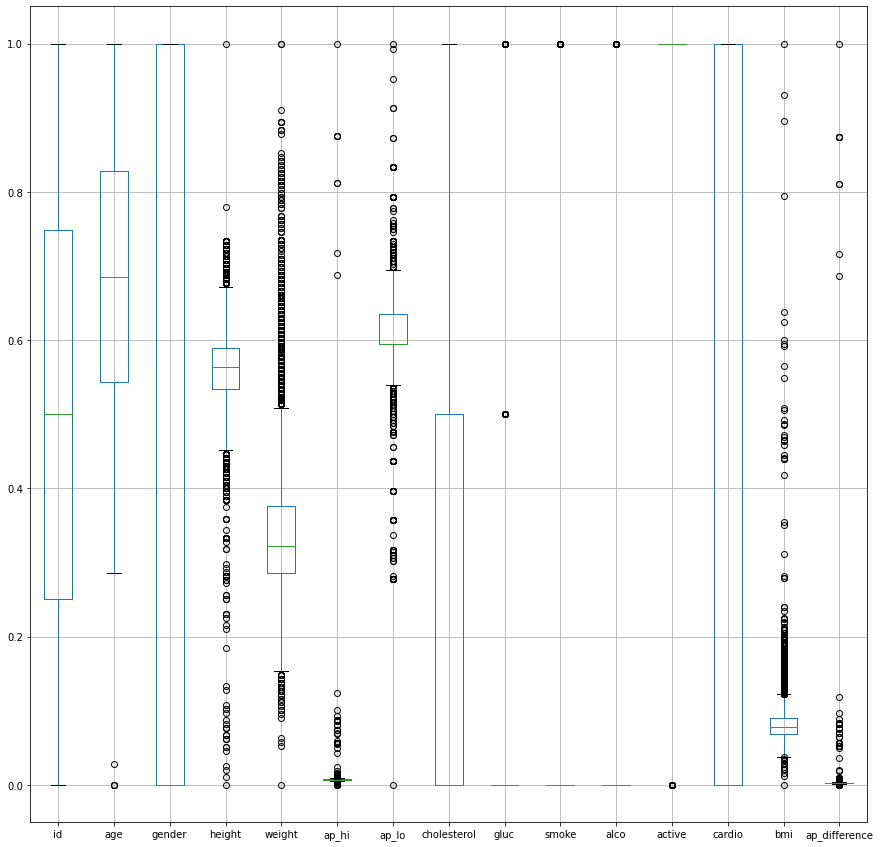

In [13]:
cardio_train_norm.boxplot(figsize = (15,15))

In [14]:
for column in ["age", "height", "weight", "ap_hi", "ap_lo", "bmi", "ap_difference"]:
    percentile25 = cardio_train_norm[column].quantile(0.25)
    percentile75 = cardio_train_norm[column].quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr   

    cardio_train_norm.loc[cardio_train_norm[column] < lower_limit,column] = np.nan
    cardio_train_norm.loc[cardio_train_norm[column] > upper_limit,column] = np.nan
    
cardio_train_norm.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,ap_difference
69995,0.99994,0.657143,1.0,0.579487,0.343915,0.006747,0.595238,0.0,0.0,1.0,0.0,1.0,0.0,0.079458,0.002259
69996,0.99996,0.914286,0.0,0.528205,NaN,0.007996,0.634921,0.5,0.5,0.0,0.0,1.0,1.0,NaN,0.002887
69997,0.99997,0.657143,1.0,0.656410,0.497354,NaN,0.634921,1.0,0.0,0.0,1.0,0.0,1.0,0.094452,NaN
69998,0.99999,0.914286,0.0,0.553846,0.322751,0.007684,0.595238,0.0,0.5,0.0,0.0,0.0,1.0,0.080040,0.003200
69999,1.00000,0.771429,0.0,0.589744,0.322751,0.006747,0.595238,0.5,0.0,0.0,0.0,1.0,0.0,0.072636,0.002259


In [15]:
cardio_train_norm.dropna(inplace=True)

In [16]:
cardio_train.shape

(68764, 15)

In [17]:
cardio_train_norm.shape

(57856, 15)

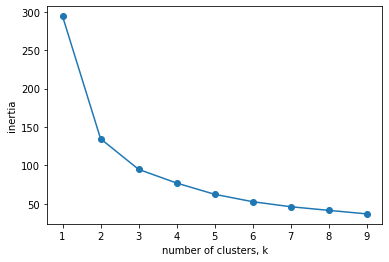

In [18]:
# Import KMeans
from sklearn.cluster import KMeans

ks = range(1, 10)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)

    # Fit model to samples
    cardio_model_norm = cardio_train_norm[["weight","ap_hi", "ap_lo", "bmi", "ap_difference"]]
    model.fit(cardio_model_norm)

    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


C:\Users\julia\AppData\Local\Temp/ipykernel_14400/2817267390.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cardio_model_norm["cluster"] = model.labels_
C:\Users\julia\AppData\Local\Temp/ipykernel_14400/2817267390.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cardio_model_norm["cluster"] = cardio_model_norm["cluster"].astype("category")


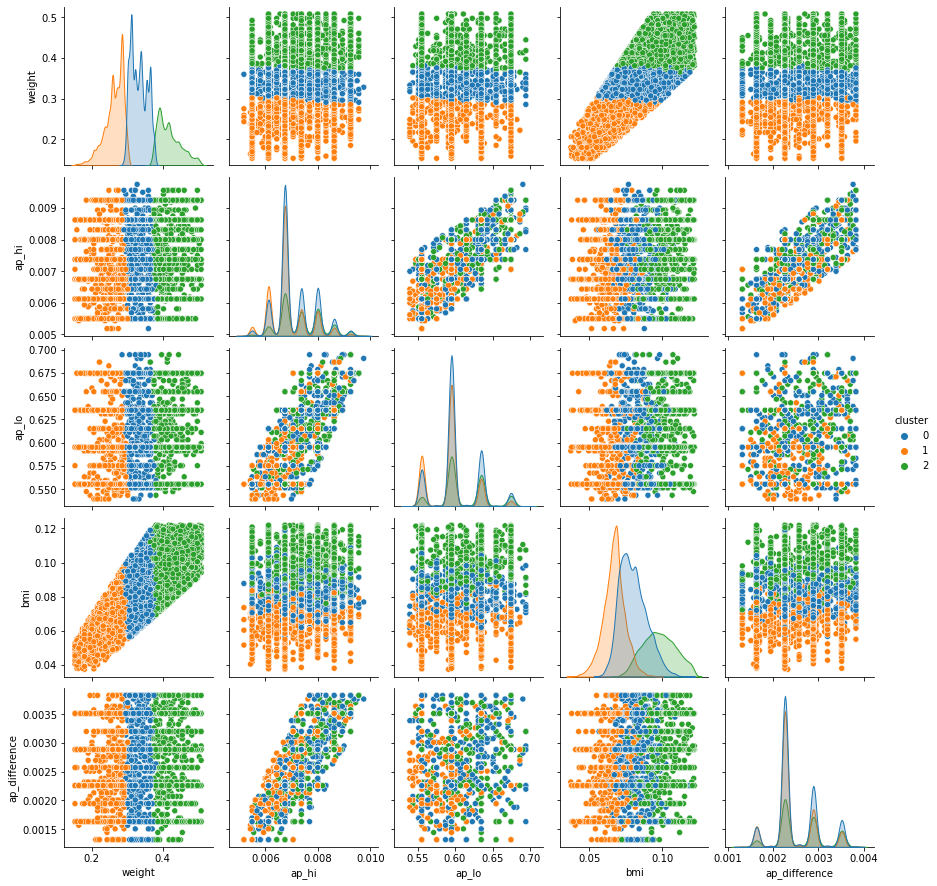

In [19]:
model = KMeans(n_clusters = 3)
model = model.fit(cardio_model_norm)

cardio_model_norm["cluster"] = model.labels_
cardio_model_norm.head()

cardio_model_norm["cluster"] = cardio_model_norm["cluster"].astype("category")

sns.pairplot(cardio_model_norm, hue="cluster")

In [20]:
cardio_train_norm = cardio_train_norm.join(cardio_model_norm["cluster"])
cardio_train_norm

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,ap_difference,cluster
0,0.00000,0.600000,1.0,0.579487,0.269841,0.006122,0.595238,0.0,0.0,0.0,0.0,1.0,0.0,0.062655,0.001632,1
1,0.00001,0.742857,0.0,0.517949,0.391534,0.007996,0.634921,1.0,0.0,0.0,0.0,1.0,1.0,0.106560,0.002887,2
2,0.00002,0.628571,0.0,0.564103,0.280423,0.007371,0.555556,1.0,0.0,0.0,0.0,0.0,1.0,0.067874,0.003514,1
3,0.00003,0.542857,1.0,0.584615,0.375661,0.008621,0.674603,0.0,0.0,0.0,0.0,1.0,1.0,0.085498,0.002887,2
5,0.00008,0.885714,0.0,0.492308,0.296296,0.006747,0.595238,0.5,0.5,0.0,0.0,0.0,0.0,0.087782,0.002259,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69991,0.99989,0.771429,0.0,0.533333,0.322751,0.007371,0.634921,0.5,0.5,0.0,0.0,1.0,0.0,0.084717,0.002259,0
69993,0.99992,0.685714,0.0,0.600000,0.312169,0.007371,0.634921,0.0,0.0,0.0,0.0,1.0,1.0,0.068394,0.002259,0
69995,0.99994,0.657143,1.0,0.579487,0.343915,0.006747,0.595238,0.0,0.0,1.0,0.0,1.0,0.0,0.079458,0.002259,0
69998,0.99999,0.914286,0.0,0.553846,0.322751,0.007684,0.595238,0.0,0.5,0.0,0.0,0.0,1.0,0.080040,0.003200,0


In [21]:
cardio_train_norm[["cardio", "cluster"]].groupby("cluster").describe()

cardio                                             
           count      mean       std  min  25%  50%  75%  max
cluster                                                      
0        25351.0  0.484636  0.499774  0.0  0.0  0.0  1.0  1.0
1        20044.0  0.391139  0.488018  0.0  0.0  0.0  1.0  1.0
2        12461.0  0.601075  0.489697  0.0  0.0  1.0  1.0  1.0

Om te kijken of er een veilige/risicovrije groep is op basis van gewicht, heb ik dit geclusterd. deze clustering heb ik op basis van de collomen "weight","ap_hi", "ap_lo", "bmi", "ap_difference" gedaan. hierna heb ik .describe gebruikt om te kijken hoe groot het aantal cardio per cluster is, hieruit kwam dat er geen cluster is met geen cardio er in, wel zijn er verschillen in grootte van de aantallen cardio te zien.